original data:
[ 99.  48. -98. ... 126. 146. 114.]
[ 99.0763579  -11.74844871 -88.96150666 ... 113.55489624 151.18996086
 113.88095509]


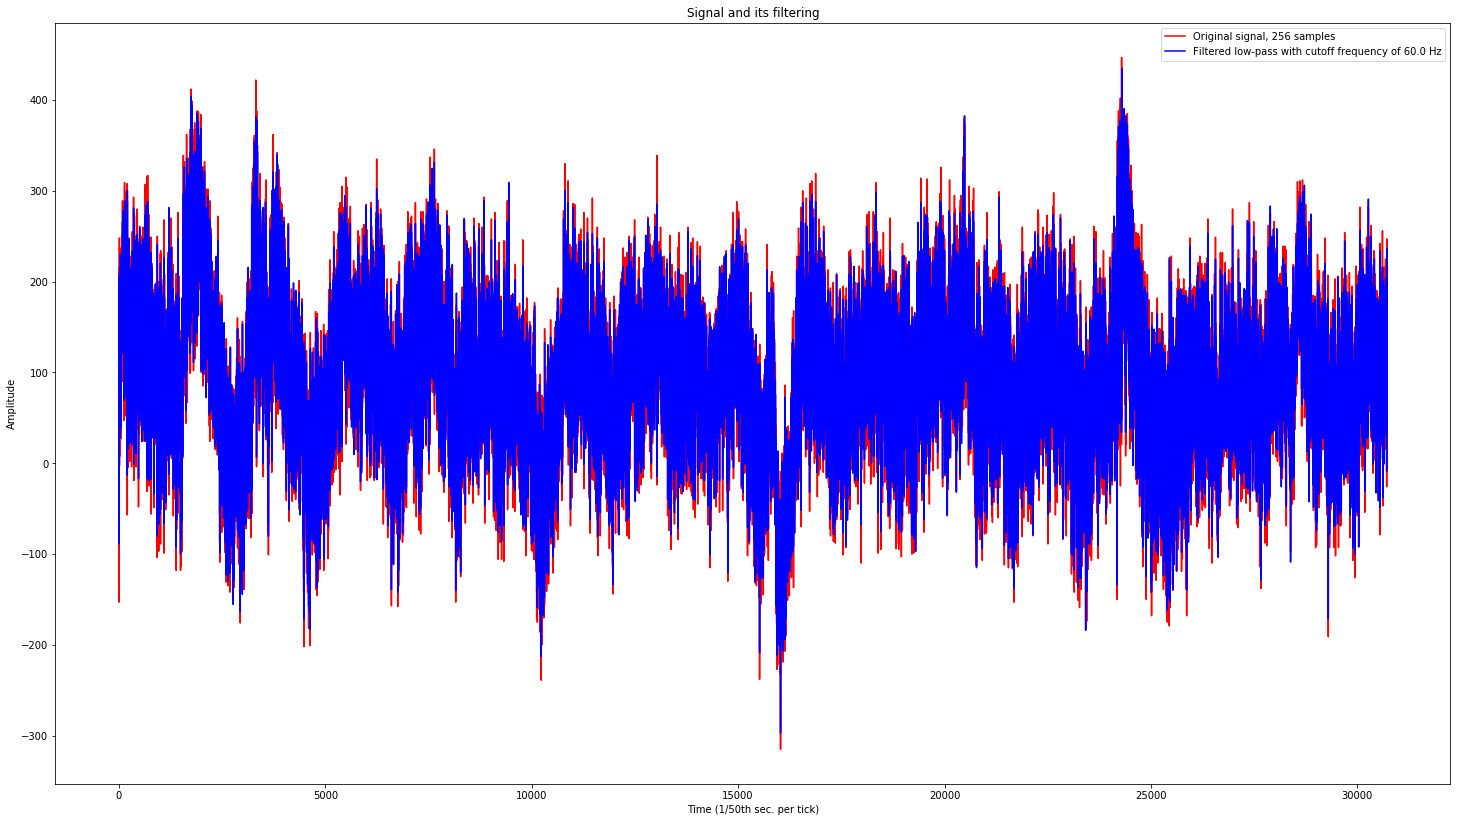

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated function get_active_sheet (Use the .active property).


30720
file saved!!


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from scipy import signal
import openpyxl


loc=(r'C:\Users\hp\Documents\Python_Scripts\music_data\Baseline Female\BF_F4.xlsx')
df = pd.read_excel(loc, sheet_name='Sheet1')

x=[]
for i in df.index:
    
    x=np.append(x,df['F3'][i])
print("original data:")
print(x)

C=5



sample_rate=256
def butter_lowpass(cutoff, nyq_freq, order=5):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(x, cutoff_freq, nyq_freq, order=5):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, x)
    return y

# Filter signal x, result stored to y: 
cutoff_frequency = 60.0
y = butter_lowpass_filter(x, cutoff_frequency, sample_rate/2)

# Difference acts as a special high-pass from a reversed butterworth filter. 
diff = np.array(x)-np.array(y)

print(y)
# Visualize
plt.figure(figsize=(25, 14))
plt.plot(x, color='red', label="Original signal, {} samples".format(sample_rate))
plt.plot(y, color='blue', label="Filtered low-pass with cutoff frequency of {} Hz".format(cutoff_frequency))
#plt.plot(diff, color='gray', label="What has been removed")
plt.title("Signal and its filtering")
plt.xlabel('Time (1/50th sec. per tick)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
#fig = plt.figure()
#fig.savefig('plot.png')


w=openpyxl.load_workbook(loc)
sheet=w.get_active_sheet()
size=y.size
print(size)
for i in range(0,size):
    sheet.cell(row=(1),column=C).value="FILTERED DATA "
    sheet.cell(row=(i+2),column=C).value=y[i]
    
w.save(loc)
print('file saved!!')



In [118]:
import numpy as np
import openpyxl
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from scipy import signal

df = pd.read_excel('G:\music_data\M01\SONG_1\M01_C4.xlsx', sheetname='Sheet1')

x=[]
for i in df.index:
    x=np.append(x,df['C3'][i])
print("original data:")
print(x.shape)

df = pd.DataFrame({'a':x})

writer = ExcelWriter('G:\music_data\M01\SONG_1\M01_F4.xlsx')
df.to_excel(writer,'Sheet2',index=False)
writer.save()

C:\Users\hp\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


original data:
(30720,)


In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from scipy import signal
import openpyxl


loc=('G:\music_data\M01_C4.xlsx')



w=openpyxl.load_workbook(loc)
sheet=w.get_active_sheet()
r=sheet.max_row
c=sheet.max_column
    

x=[]
for i in range(1,c):
    temp=[]
    for j in range(2,r):
        temp.append(sheet.cell(row=j,column=i).value)
    x.append(temp)
print("original data:")
print(x)

<input>:10: DeprecationWarning: invalid escape sequence \m
<input>:10: DeprecationWarning: invalid escape sequence \m
<input>:10: DeprecationWarning: invalid escape sequence \m
<ipython-input-146-678a2aab1334>:10: DeprecationWarning: invalid escape sequence \m
  loc=('G:\music_data\M01_C4.xlsx')


original data:
[[8, -71, -76, 2, 66, 31, -60, -78, 9, 76, 29, -52, -68, -61, -82, -75, 2, 55, -6, -102, -88, 18, 57, -28, -116, -92, 4, 52, -2, -95, -108, -27, 31, -17, -96, -82, 4, 37, -28, -106, -98, -15, 38, -12, -94, -90, -1, 56, 7, -87, -103, -17, 51, 4, -85, -77, 25, 77, 11, -81, -77, 9, 58, 8, -68, -76, -12, 34, -1, -66, -63, 14, 57, -8, -99, -91, 5, 56, -2, -80, -77, -4, 37, -7, -82, -91, -25, 16, -28, -94, -80, 5, 46, -11, -88, -77, 13, 57, -11, -100, -90, 1, 53, 4, -79, -80, 2, 57, 4, -84, -77, 19, 66, -7, -103, -99, -10, 44, -1, -79, -80, 3, 59, 13, -70, -77, -3, 50, 7, -82, -98, -20, 45, 4, -83, -89, -5, 45, -12, -81, -50, 31, 40, -36, -101, -78, 2, 40, -14, -90, -84, 0, 45, -13, -95, -99, -26, 32, 1, -77, -89, -17, 28, -27, -110, -100, -5, 48, -11, -95, -83, 6, 48, -9, -81, -70, 8, 42, -16, -94, -89, -7, 49, 7, -84, -104, -24, 45, 1, -90, -96, -11, 46, -1, -88, -99, -22, 37, -4, -94, -112, -27, 44, -3, -104, -115, -24, 46, 6, -93, -126, -59, 2, -37, -116, -110, -25, 21, -3

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated function get_active_sheet (Use the .active property).
  from ipykernel import kernelapp as app
